In [130]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

# Homework 5: Simulating random events
# Due Monday 2/19 at 11:59pm

In [131]:
import autograder_tools as at
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Point Breakdown

| **Question #** | **Points**  |
| -------------- | :---------: |
| Question 1     | 29          |
| Question 2     | 24          |

## Question 1: Random mutation of genes
The mutation of genes can be modeled as random replacement of individual nucleotides. We will simulate this process by generating strings of DNA from the set `{ A, C, G, T}` and treating a mutation as a change in the letter at a random position.

### Question 1A (5pts): Generate a random string of DNA  
Use `np.random.choice()` to generate an array of 500 characters from the set  `{ A, C, G, T}`. Convert this array to a string with the `''.join()` method. <br>
For example `''.join(['A', 'B', 'C'])`
returns `'ABC'`.

Assign this string to the variable `start_dna` for grading.

In [132]:
dna_chars= np.random.choice(['A', 'C', 'G', 'T'], 500, p=[0.25,0.25,0.25,0.25])
start_dna= ''.join(dna_chars)

In [133]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b (10 pts): DNA String Mutation    
Write a function called `mutate_once`. The function should have one input, `input_dna`, a string. It should return a string of same length in which one random mutation has occurred. To do this, you should select a random position along the input string and replace the current nucleotide with one of the three other nucleotides (chosen randomly). 

*Note*: this function should work for an input string of any size.

In [134]:
def get_letter(og_letter):
    if og_letter == 'A':
        return np.random.choice(['T', 'C', 'G'], 1, p=[0.33, 0.33, 0.34])
    if og_letter == 'T':
        return np.random.choice(['A', 'C', 'G'], 1, p=[0.33, 0.34, 0.33])
    if og_letter == 'C':
        return np.random.choice(['T', 'A', 'G'], 1, p=[0.34, 0.33, 0.33])
    if og_letter =='G':
        return np.random.choice(['T', 'C', 'A'], 1, p=[0.33, 0.33, 0.34])

def mutate_once(input_dna):
    random_num = np.random.choice(np.arange(len(input_dna)))
    og_letter = input_dna[random_num]
    new_letter = get_letter(og_letter)
    new_letter = new_letter[0]
    new_string = ''.join([input_dna[:random_num], new_letter, input_dna[random_num+1:]])
    return new_string
    
# test your function using these print statements below
print(f'dna before mutation:  ATGC')
print(f'dna after 1 mutation: {mutate_once("ATGC")}') # test function

dna before mutation:  ATGC
dna after 1 mutation: GTGC


In [135]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c (7pts): Hamming distance
The [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) is defined as the number of positions in which two equal length strings differ. For DNA. the Hamming distance is the number of positions for which two DNA sequences of the same length have different bases.

For example, the Hamming distance between `AAAA` and  `AAAT` is 1, as the bases are different only at the last position. 
  
Define a function named `hamming` which takes two separate strings as inputs and returns the Hamming distance between them. Assume the input strings are of equal length.  


In [136]:
def hamming(str1, str2):
    ham_num = 0
    for i in range(len(str1)):
        if str1[i] != str2[i]:
            ham_num = ham_num + 1
    return ham_num

In [137]:
grader.check("q1c")

q1c results: All test cases passed!

### Question 1d (7pts): Plotting changes to DNA over successive mutation events
Use your `mutate_once` function to successively mutate `start_dna` (as generated in **q1a**)  7000 times. After each mutation, calculate the proportion of the DNA that is different from the original starting DNA string. To calculate this proportion, use the `hamming` function and divide by the length of the DNA string. After each mutation, save the calculated proportion to a list, `proportion_changed_list`. 
  
Make a plot of how this changed proportion varies with successive mutations. Plot proportion of DNA changed on vertical axis and mutation number on the horizontal axis.

Text(0.5, 1.0, 'Proportion of Different DNA vs Number of Mutations')

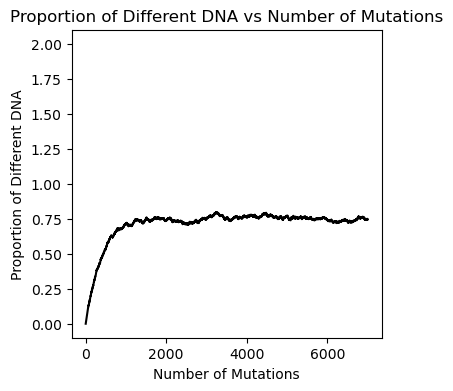

In [138]:
proportion_changed_list = []
dna_string = start_dna

for i in range(7000):
    new_dna = mutate_once(dna_string)
    ham_num = hamming(new_dna, start_dna)
    proportion_changed_list.append(ham_num/len(dna_string))
    dna_string = new_dna

    
fig=plt.figure()
fig.set_size_inches(4,4)
ax=fig.add_subplot(111)
ax.plot(range(7000), proportion_changed_list,2, color='k')
ax.set_xlabel('Number of Mutations')
ax.set_ylabel('Proportion of Different DNA')
ax.set_title('Proportion of Different DNA vs Number of Mutations')

In [139]:
grader.check("q1d")

q1d results: All test cases passed!

#### Question 1e (0 pts)
Does your plot indicate that the proportion of DNA changed reaches an eventual asymptote? If so, what is this value? Why does this make sense?

The plot indicates that the proportion of DNA changed reaches an eventual asymptote, at 0.75. This makes sense because, at most, each character only has a 3/4 (or 0.75) chance of being different than the original letter. Eventually, the DNA is mutated so much that it is compounded to about 0.75.

## Question 2: Does this fly belong to a new species?

The common fruit fly (*Drosophila melanogaster*) has ~700 distinct ommatidia, each of which functions something like an eye. Each ommatidium has eight photoreceptors, which detect light over a specific frequency spectrum. One of these photoreceptor types, named R7, has a *pale* and *yellow* subtype. These subtypes are randomly set in individual ommatidia during development, with an overall distribution of 30% *pale* and 70% *yellow* subtypes.<br>

For more background about the biology behind this random process, you can read this [paper](https://www.sciencedirect.com/science/article/pii/S0960982205013151), this [review article](
https://www.sciencedaily.com/releases/2006/03/060312205905.htm), or this [paper](
https://www.nature.com/articles/nature04615)

On a field trip to a remote site in South America, you find an isolated population of fruit flies that appear to be *D. melanogaster* but have some distinct visually-driven behaviors. You bring specimens back to the lab to examine their R7 photoreceptors to see if they adhere to the standard expected distribution. Of 321 R7 photoreceptors, you observe 245 are *yellow* and 76 are *pale*. Use a simulation-based approach to determine the probability of obtaining these results if the subtypes were generated according to the standard 70% *yellow*/30% *pale* probability distribution.



### Question 2a (8 pts): Simulate one set of photoreceptor measurements
Write a function `run_one_fly_simulaton`, which takes a single input, `num_measured_receptors`, the number of photoreceptors measured, and returns `yellow_count`, the number of yellow photoreceptors measured. Your function should call `np.random.choice` to simulate a random process with the 70% yellow, 30% pale probabilities.


In [140]:
def run_one_fly_simulation(num_measured_receptors):
    counts = np.random.choice(['yellow', 'pale'], num_measured_receptors, p=[0.7,0.3])
    yellow_count = sum(counts=='yellow')
    return yellow_count
    
yellow_observation=run_one_fly_simulation(321)
print(yellow_observation)




232


In [141]:
grader.check("q2a")

q2a results: All test cases passed!

### Question 2b (8pts): Simulate many sets of photoreceptor measurements
Write a function `run_many_fly_simulations`, which takes two inputs: `num_simulations`, an integer, and `num_measured_receptors`. Your function should return an array which contains the yellow photoreceptor count for each simulation. 

In [142]:
def run_many_fly_simulations(num_simulations, num_measured_receptors):
    yellow_list = []
    for sim in np.arange(num_simulations):
        yellow_count = run_one_fly_simulation(num_measured_receptors)
        yellow_list.append(yellow_count)
    return yellow_list



In [143]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 2c (8pts): Is the initial observation consistent with the random model?
If the underlying probability of a yellow photoreceptor is 70%, then we would expect that over many experiments in which we sampled 321 photoreceptors, the mean yellow count would be 0.7 x 321, or 224.7, which should be close to the simulated mean printed in the above cell. <br>
For the observed value of 245 photoreceptors, the difference from this mean was 20.3 (245-224.7). We can simulate many experiments to determine how likely it is to observe a count difference of this magnitude in a given experiment.

To do this, generate an array of yellow photoreceptor counts from 1000 simulations using your `run_many_fly_simulations` function. Then make an array `abs_diffs_from_mean` (also length 1000). This array should contain the absolute value of the difference between each simulated count and the expected mean of 224.7 <br>Make a histogram of the values of `abs_diffs_from_mean` and plot a vertical line at the difference corresponding to the observed count of 245.

Calculate the proportion of this difference distribution which is higher or equal to the observed difference. Assign this proportion to `pvalue`. This variable `pvalue` indicates the probability of obtaining a difference greater or equal to the observed difference if the random model is correct.




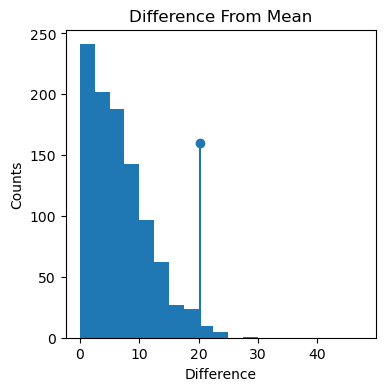

In [144]:
yellow_counts = run_many_fly_simulations(1000, 321)
abs_diffs_from_mean = []

for i in range(1000):
    diff = abs(yellow_counts[i] - 224.7)
    abs_diffs_from_mean.append(diff)

fig=plt.figure()
fig.set_size_inches(4,4)
ax=fig.add_subplot(111)
ax.stem(20.3, 160)

my_array=np.arange(0,50,2.5)
ax.hist(abs_diffs_from_mean, bins=my_array, orientation='vertical')
ax.set_xlabel('Difference')
ax.set_ylabel('Counts')
ax.set_title('Difference From Mean')

counts_over_mean = 0
for i in range(1000):
    if abs_diffs_from_mean[i] > 20.3:
        counts_over_mean = counts_over_mean+1
pvalue = counts_over_mean / 1000

In [145]:
grader.check("q2c")

q2c results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [129]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q1d results: All test cases passed!

    q2a results: All test cases passed!

    q2b results: All test cases passed!

    q2c results:
        q2c - 1 result:
            ❌ Test case failed
            Trying:
                assert np.isclose(pvalue ** 2, 0.001, atol=0.001)
            Expecting nothing
            **********************************************************************
            Line 1, in q2c 0
            Failed example:
                assert np.isclose(pvalue ** 2, 0.001, atol=0.001)
            Exception raised:
                Traceback (most recent call last):
                  File "/opt/conda/lib/python3.11/doctest.py", line 1353, in __run
                    exec(compile(example.source, filena